# LEARNING  AUTOENCODER


we are using pytorch for neural networks


In [ ]:
import torch; torch.manual_seed(0)
import torch.nn as nn
import torch.nn.functional as F
import torch.utils
import torch.distributions
import torchvision
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
plt.rcParams.update({'font.size': 12})

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)


cpu


# Lets learn autoencoder first

**Encoder**

In [ ]:
class Encoder(nn.Module):
    def __init__(self, latent_dims):
        super(Encoder, self).__init__()
        self.linear1 = nn.Linear(784, 512)
        self.linear2 = nn.Linear(512, latent_dims)

    def forward(self, x):
        x = torch.flatten(x, start_dim=1)
        x = F.relu(self.linear1(x))
        return self.linear2(x)

In [49]:
print(Encoder.eval)

<function Module.eval at 0x7ab098a745e0>


In [50]:
Encoder.eval

<function torch.nn.modules.module.Module.eval(self: ~T) -> ~T>

**Decoder**

In [ ]:
class Decoder(nn.Module):
    def __init__(self, latent_dims):
        super(Decoder, self).__init__()
        self.linear1 = nn.Linear(latent_dims, 512)
        self.linear2 = nn.Linear(512, 784)

    def forward(self, z):
        z = F.relu(self.linear1(z))
        z = torch.sigmoid(self.linear2(z))
        return z.reshape((-1, 1, 28, 28))

**Auto Encoder**

In [ ]:
class Autoencoder(nn.Module):
    def __init__(self, latent_dims):
        super(Autoencoder, self).__init__()
        self.encoder = Encoder(latent_dims)
        self.decoder = Decoder(latent_dims)

    def forward(self, x):
        z = self.encoder(x)
        return self.decoder(z)

In [ ]:
def train(autoencoder,data, epochs):
  opt = torch.optim.Adam(autoencoder.parameters())
  for epoch in range(epochs):
    for x, y in data:
      x = x.to(device)
      opt.zero_grad()
      x_hat = autoencoder(x)
      loss = ((x - x_hat)**2).sum()
      loss.backward()
      opt.step()
  return autoencoder, loss

In [ ]:
latent_dims = 2
autoencoder = Autoencoder(latent_dims).to(device) # GPU

data = torch.utils.data.DataLoader(
        torchvision.datasets.MNIST('./data',
               transform=torchvision.transforms.ToTensor(),
               download=True),
        batch_size=128,
        shuffle=True)

autoencoder, loss = train(autoencoder, data,10)

In [69]:
print(data)
print(type(data))


<class 'torch.utils.data.dataloader.DataLoader'>
<built-in method tensor of type object at 0x7ab09ab904a0>


tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0.

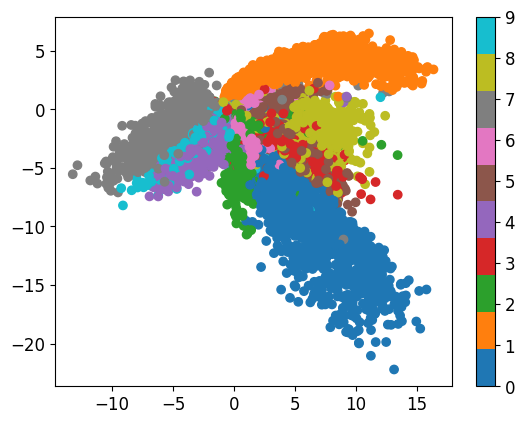

In [62]:
def plot_latent(autoencoder, data, num_batches=100):
    count=0
    for i, (x, y) in enumerate(data):
        #print(i)
        z = autoencoder.encoder(x.to(device))
        z = z.to('cpu').detach().numpy()
        #print(z)
        plt.scatter(z[:, 0], z[:, 1], c=y, cmap='tab10')

        if i > num_batches:
          print(x,y)
          print(i)
          plt.colorbar()
          count=count+1
          break
    print("count=",count)

plot_latent(autoencoder, data)

In [66]:
enum_data = enumerate(data)
print(enum_data)


101


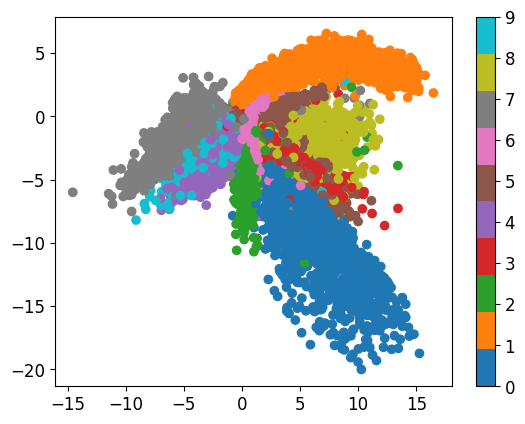

In [35]:
plot_latent(autoencoder, data)

In [36]:
def plot_reconstructed(autoencoder, r0=(-5, 10), r1=(-10, 5), n=12):
    w = 28
    img = np.zeros((n*w, n*w))
    for i, y in enumerate(np.linspace(*r1, n)):
        for j, x in enumerate(np.linspace(*r0, n)):
            z = torch.Tensor([[x, y]]).to(device)
            x_hat = autoencoder.decoder(z)
            x_hat = x_hat.reshape(28, 28).to('cpu').detach().numpy()
            img[(n-1-i)*w:(n-1-i+1)*w, j*w:(j+1)*w] = x_hat
    plt.imshow(img, extent=[*r0, *r1])

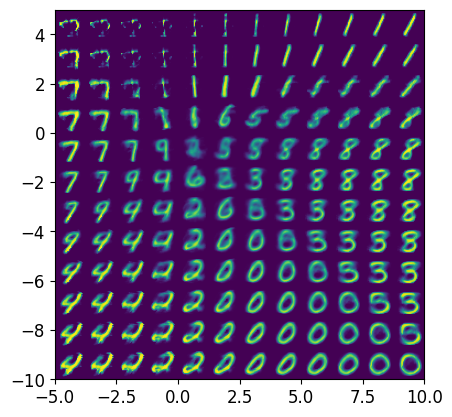

In [51]:
plot_reconstructed(autoencoder)